# COMP47590 Advanced Machine Learning
# Basic Machine Learning in Python - MNIST

## Imports

To build predictive models in Python we use a set of libraries that are imported here. In particular **pandas** and **sklearn** are particularly important.

In [1]:
#import os
#import subprocess
import io
import random

import pandas as pd  # core data handling package
import numpy as np  # core data handling package
import matplotlib  # core plotting functioanlity
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns  # nicer plotting functionlity
# import missingno # For nice missing number analysis

import sklearn  # For basic machine learning functionality
import sklearn.preprocessing
import sklearn.metrics
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
import sklearn.svm
import sklearn.linear_model
import sklearn.neighbors
import sklearn.neural_network

## Data Prep

### Setup

Take only a sample of the dataset for fast testing

In [2]:
data_sampling_rate = 0.1

Setup the number of folds for all grid searches (should be 5 - 10)

In [3]:
cv_folds = 2

Set up a dictionary to store simple model performance comparions

In [4]:
model_valid_accuracy_comparisons = dict()
model_accuracy_comparisons = dict()
model_tuned_params_list = dict()

### Load Data

Load the dataset and explore it.

In [5]:
file_name = '../Data/mnist_train.csv'

target_feature = "label"
num_classes = 10
classes = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}

In [6]:
dataset = pd.read_csv(file_name)
dataset = dataset.sample(frac=data_sampling_rate)  #take a sample from the dataset so everyhting runs smoothly
display(dataset.head())

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
30018,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34745,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5025,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53795,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46179,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dataset.shape

(6000, 785)

### Explore Data

Examine the distribution of the target levels

In [8]:
dataset[target_feature].value_counts()

label
1    678
7    670
3    648
2    612
6    583
9    574
8    569
4    559
0    558
5    549
Name: count, dtype: int64

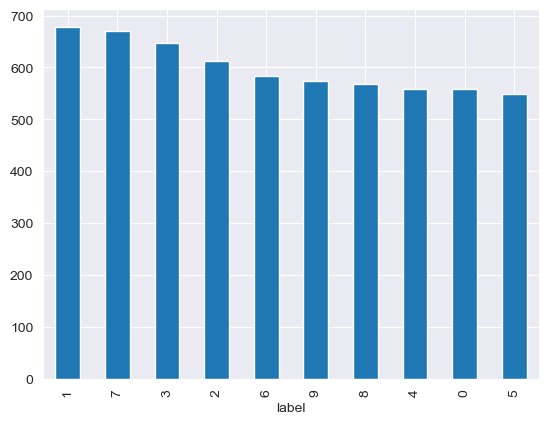

In [9]:
dataset[target_feature].value_counts().plot(kind='bar')
plt.show()

Display summary statistics for each feature.

In [10]:
# Print descriptive statsitcs for each column
print("Summary Stats")
if dataset.select_dtypes(include=[np.number]).shape[1] > 0:
    display(dataset.select_dtypes(include=[np.number]).describe().transpose())

if dataset.select_dtypes(include=[object]).shape[1] > 0:
    display(dataset.select_dtypes(include=[object]).describe().transpose())

Summary Stats


,count,mean,std,min,25%,50%,75%,max
label,6000.0,4.4555,2.865145,0.0,2.0,4.0,7.0,9.0
1x1,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x2,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x3,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
1x4,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x25,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x26,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
28x27,6000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


Examine presence of missing values

In [11]:
# Check for presence of missing values
print("Missing Values")
print(dataset.isnull().sum().sort_values(ascending=False))

Missing Values
label    0
19x12    0
19x14    0
19x15    0
19x16    0
        ..
10x12    0
10x13    0
10x14    0
10x15    0
28x28    0
Length: 785, dtype: int64


Plot a nice diagram showing missing values - especially usefuol for combined missing values.

In [12]:
# missingno.matrix(dataset)
# plt.show()

Generate a plot (histogram or bar plot) for each feature in the dataset. (Commented out for MNIST)

In [13]:
# for f in dataset.select_dtypes(include=['number']).columns:
#    print(f)
#    sns.histplot(dataset[f])
#    plt.title(f)
#    plt.show()

In [14]:
# for f in dataset.select_dtypes(include=['object']).columns:
#    print(f)
#    sns.barplot(dataset[f].value_counts())
#    plt.title(f)
#    plt.show()

We can do nice overall exploration using the **pandas_profiling** package. 

(Commented out as *SLOOOOOW* and not very useful for MNIST.)

In [15]:
#pandas_profiling.ProfileReport(dataset, minimal = True)

Display some of the instances in the dataset (only really useful for images).

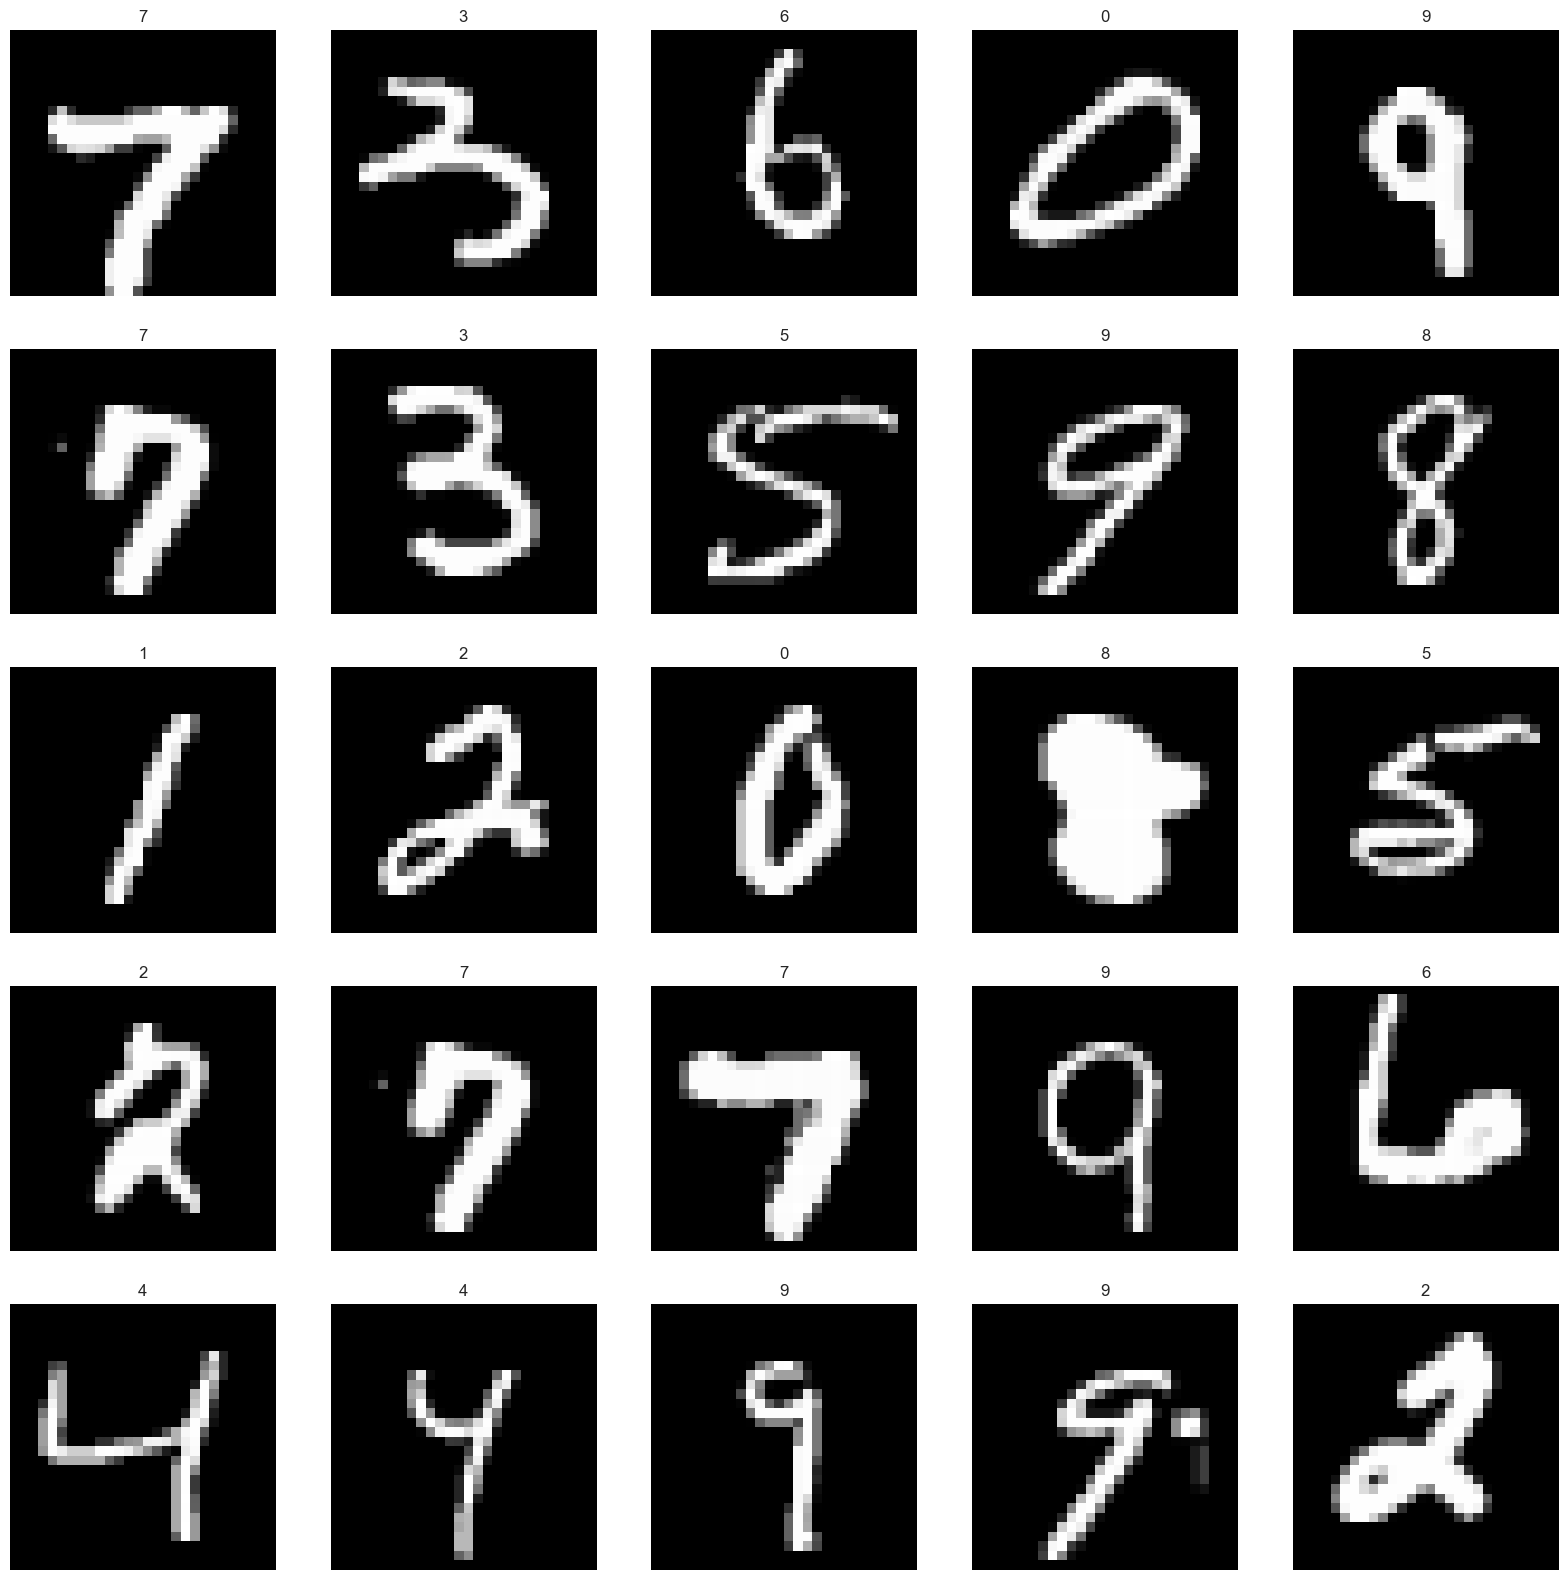

In [16]:
pltsize = 4
row_images = 5
col_images = 5
plt.figure(figsize=(col_images * pltsize, row_images * pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, dataset.shape[0])
    plt.subplot(row_images, col_images, i + 1)
    plt.axis('off')
    plt.imshow((dataset.iloc[i_rand, 1:]).values.reshape(28, 28), cmap='gray', vmin=0, vmax=256)
    plt.title(str(classes[dataset[target_feature].iloc[i_rand]]))
plt.show()

### Partition Dataset

Isolate the descriptive features we are interested in

In [17]:
X = dataset[dataset.columns[1:]]
y = dataset[target_feature]

Split the data into a **training set** and **validation set**

In [18]:
X_train, X_valid, y_train, y_valid \
    = sklearn.model_selection.train_test_split(X, y,
                                               shuffle=True,
                                               stratify=y,
                                               train_size=0.7)

### Preprocess Dataset

Normalise the data (important for some models but not used in this example.)

In [19]:
# Make the min max scalar object
#min_max_scaler = sklearn.preprocessing.MinMaxScaler((-1,1))
#min_max_scaler.fit(X_train)
#
## Train the scalar on the training dataset
#a = min_max_scaler.transform(X_train)
#
#X_train = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 
#
## Also normalise other partitions
#a = min_max_scaler.transform(X_valid)
#X_valid = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 

Normalise the data (using hardcoded approach based on domain knowledge)

In [20]:
X_train = (X_train / 255 * 2) - 1
X_valid = (X_valid / 255 * 2) - 1

In [21]:
display(X_train.shape)
display(X_train.head())
display(X_valid.shape)
display(X_valid.head())

(4200, 784)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
5791,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
47851,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
744,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
30874,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
36650,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


(1800, 784)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
28697,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
32999,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
24012,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15050,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
43589,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Check that we haven't messed up the dataset!

In [22]:
# Print descriptive statsitcs for each column
print("Summary Stats")
if dataset.select_dtypes(include=[np.number]).shape[1] > 0:
    display(X_train.select_dtypes(include=[np.number]).describe().transpose())

if dataset.select_dtypes(include=[object]).shape[1] > 0:
    display(X_train.select_dtypes(include=[object]).describe().transpose())

Summary Stats


,count,mean,std,min,25%,50%,75%,max
1x1,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1x2,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1x3,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1x4,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1x5,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...
28x24,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
28x25,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
28x26,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
28x27,4200.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0


Because we are working with some images plot some. 

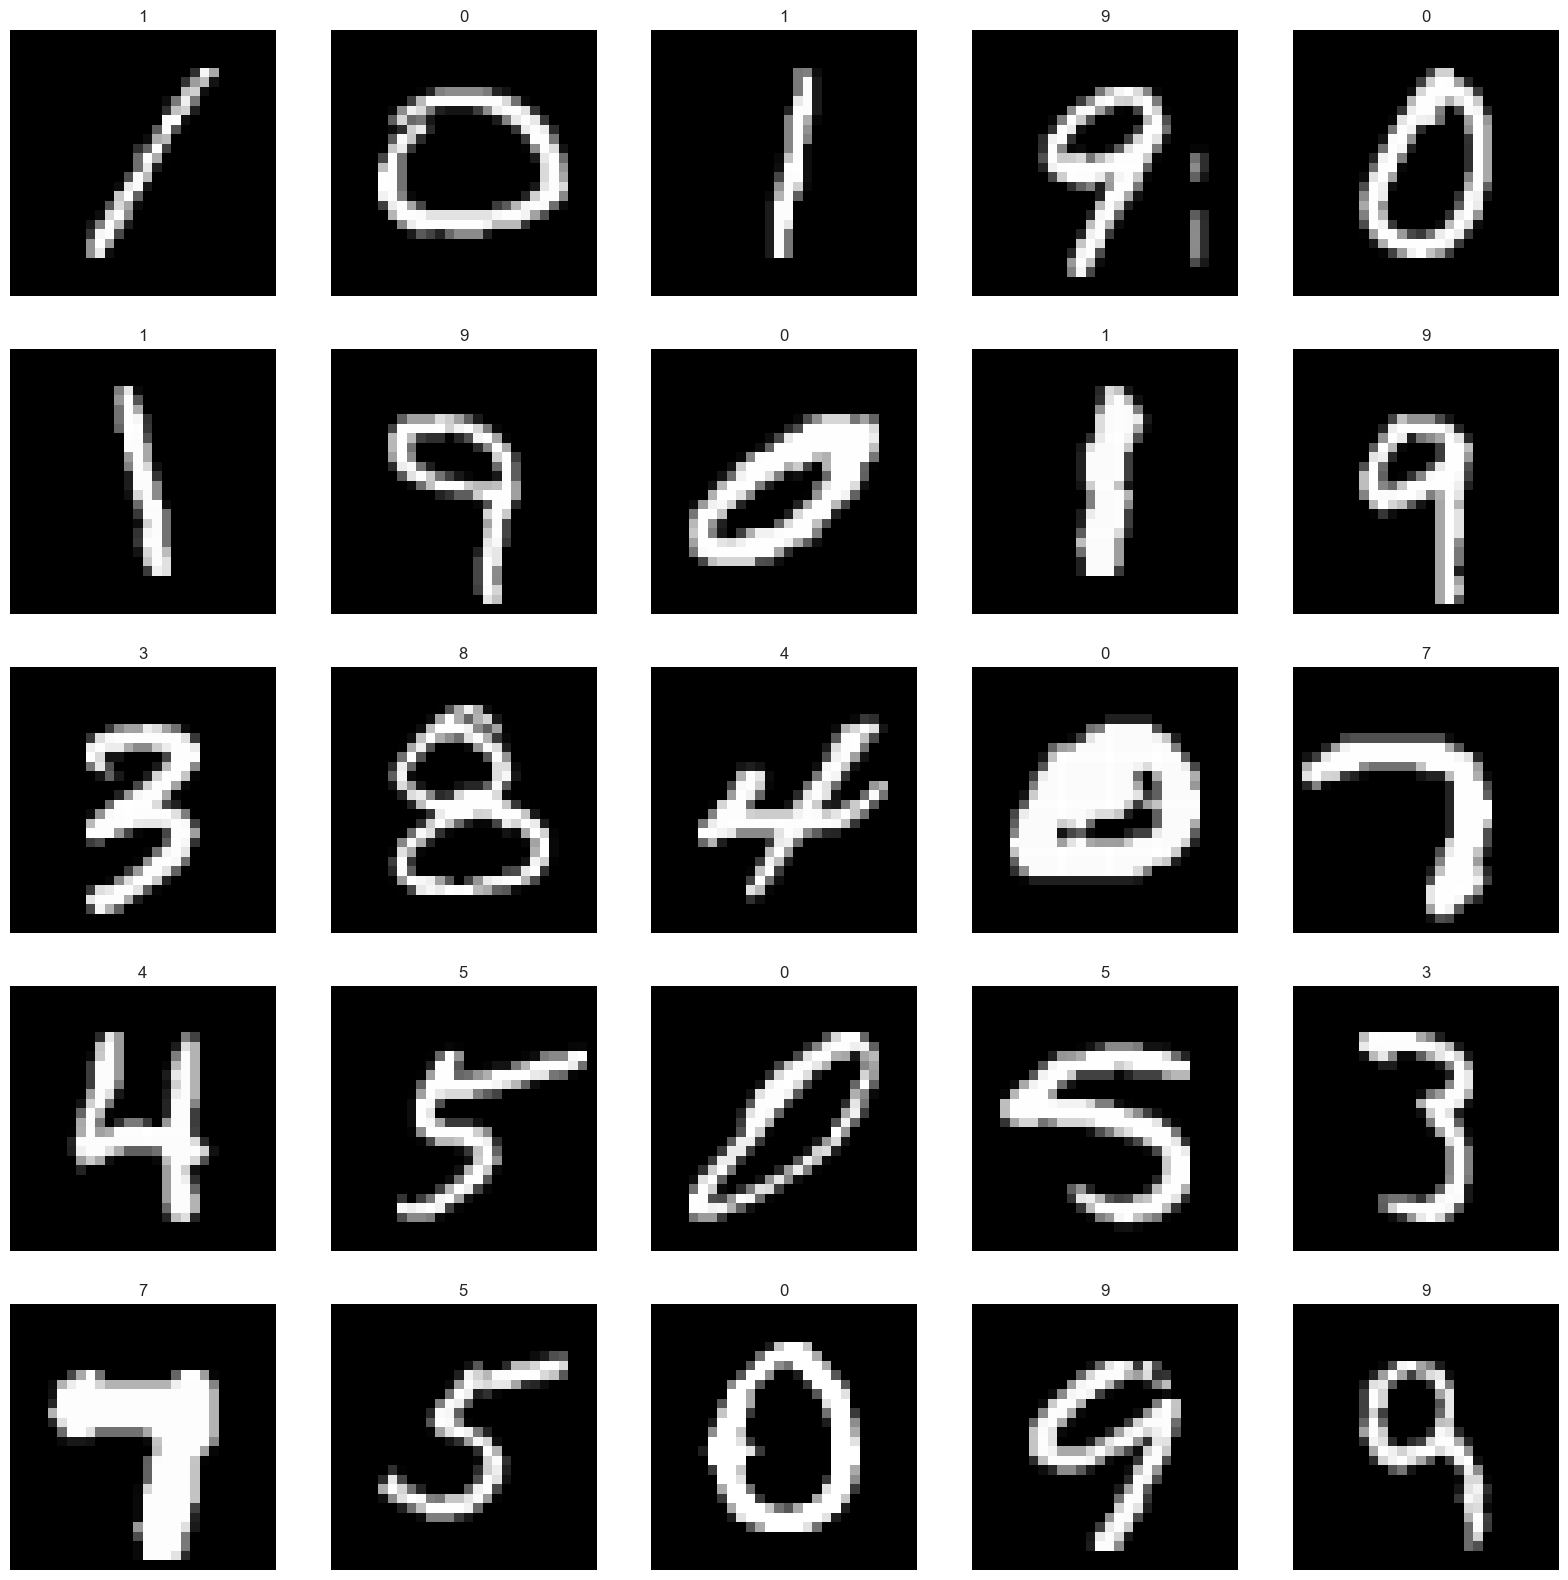

In [23]:
pltsize = 4
row_images = 5
col_images = 5
plt.figure(figsize=(col_images * pltsize, row_images * pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, X_train.shape[0])
    plt.subplot(row_images, col_images, i + 1)
    plt.axis('off')
    plt.imshow((X_train.iloc[i_rand]).values.reshape(28, 28), cmap='gray', vmin=-1, vmax=1)
    plt.title((str(classes[y_train.iloc[i_rand]])))
plt.show()

## Building Simple Models

Train a decision tree, setting min samples per leaf to a sensible value

In [24]:
my_tree = sklearn.tree.DecisionTreeClassifier(min_samples_split=0.05)
my_tree = my_tree.fit(X_train, y_train)

Assess the performance of the decision tree on the **training set**

Accuracy: 0.7066666666666667
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       391
           1       0.99      0.82      0.90       475
           2       0.66      0.80      0.72       428
           3       0.70      0.65      0.68       454
           4       0.71      0.71      0.71       391
           5       0.52      0.47      0.49       384
           6       0.74      0.68      0.71       408
           7       0.94      0.77      0.85       469
           8       0.44      0.72      0.55       398
           9       0.64      0.70      0.67       402

    accuracy                           0.71      4200
   macro avg       0.73      0.70      0.71      4200
weighted avg       0.74      0.71      0.71      4200

Confusion Matrix


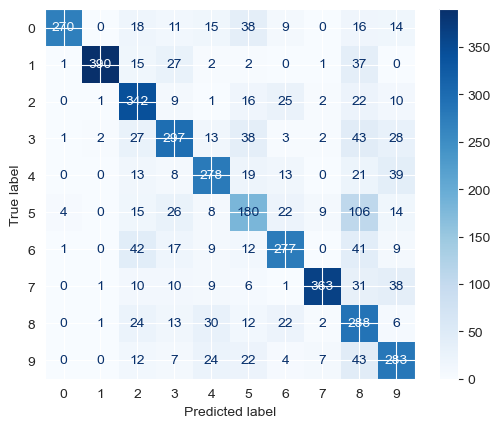

In [25]:
# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)  # , normalize=True, sample_weight=None
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred, cmap='Blues')
plt.show()

Assess the performance of the decision tree on the **validation set**

Accuracy: 0.6683333333333333
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       167
           1       0.98      0.81      0.89       203
           2       0.59      0.73      0.65       184
           3       0.64      0.60      0.62       194
           4       0.64      0.73      0.69       168
           5       0.52      0.53      0.52       165
           6       0.69      0.60      0.64       175
           7       0.90      0.75      0.82       201
           8       0.41      0.62      0.49       171
           9       0.66      0.63      0.64       172

    accuracy                           0.67      1800
   macro avg       0.69      0.66      0.67      1800
weighted avg       0.70      0.67      0.68      1800

Confusion Matrix


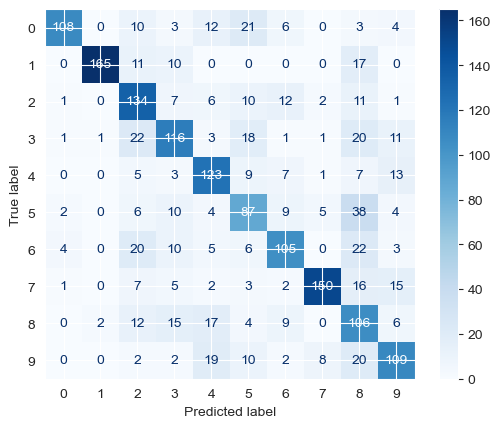

In [26]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)  # , normalize=True, sample_weight=None
model_valid_accuracy_comparisons["Better Tree"] = accuracy
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

## Evaluating Using Cross Validation

Use a cross validation to perfrom an evaluation

In [27]:
my_tree = sklearn.tree.DecisionTreeClassifier(min_samples_split=0.05)
cv_results = sklearn.model_selection.cross_validate(my_tree, X, y, cv=10)
print(cv_results)

{'fit_time': array([0.45159197, 0.42614508, 0.41369271, 0.37563801, 0.37187386,
       0.40871191, 0.38606215, 0.37507915, 0.38265204, 0.36936712]), 'score_time': array([0.00380516, 0.00242615, 0.00260139, 0.00313234, 0.0020752 ,
       0.00319123, 0.0021131 , 0.00219011, 0.00239277, 0.00332499]), 'test_score': array([0.7       , 0.675     , 0.65      , 0.67166667, 0.67333333,
       0.69666667, 0.705     , 0.67666667, 0.68      , 0.65833333])}


## Choosing Parameters Using a Grid Search

A common way to tune models is to use a grid search through a large set of possible parameters. Here we try depths between 3 and 20 and different limits on the minimum number of samples per split.

In [28]:
# Set up the parameter grid to seaerch
param_grid = {'criterion': ['gini', "entropy"], \
              'max_depth': list(range(3, 50, 3)), \
              'min_samples_split': [50]}

# Perform the search
my_tuned_tree = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), \
                                                     param_grid, cv=cv_folds, verbose=2, \
                                                     return_train_score=True, n_jobs=-1)
my_tuned_tree.fit(X, y)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree.best_params_)
model_tuned_params_list["Tuned Tree"] = my_tuned_tree.best_params_
display(my_tuned_tree.best_score_)
display(my_tuned_tree.cv_results_)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best parameters set found on development set:


{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 50}

0.7171666666666667

{'mean_fit_time': array([0.13670492, 0.28142262, 0.347767  , 0.38261688, 0.3977896 ,
        0.38800931, 0.37319398, 0.38339889, 0.35986781, 0.32704163,
        0.33103311, 0.33267546, 0.33825994, 0.35666192, 0.35383689,
        0.38771546, 0.18561804, 0.38696754, 0.44391155, 0.46102452,
        0.47527957, 0.49802685, 0.50509346, 0.48040402, 0.4606055 ,
        0.4432354 , 0.4392854 , 0.43066955, 0.41733932, 0.3984077 ,
        0.36881292, 0.34124243]),
 'std_fit_time': array([0.00115204, 0.01723838, 0.00444019, 0.01861489, 0.00964844,
        0.0018785 , 0.00960994, 0.01155794, 0.01272011, 0.01760054,
        0.00463402, 0.01346445, 0.00592899, 0.02221096, 0.01319206,
        0.0179795 , 0.00480592, 0.03132236, 0.02096653, 0.02581859,
        0.0040915 , 0.00927806, 0.00289047, 0.02186024, 0.01212466,
        0.00334072, 0.00403845, 0.00217843, 0.00183296, 0.00823569,
        0.005808  , 0.01580441]),
 'mean_score_time': array([0.0080055 , 0.0058409 , 0.00647688, 0.01073205, 0.007728

## Comparing Models

We can easily use the same patterns to train other types of models.

### Random Forests

Train and evaluate a simple model 

In [29]:
# Do the same job with random forests
my_model = sklearn.ensemble.RandomForestClassifier(n_estimators=300, \
                                                   max_features=3, \
                                                   min_samples_split=200)
my_model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, min_samples_split=200, n_estimators=300)

Accuracy: 0.8416666666666667
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       167
           1       0.84      1.00      0.91       203
           2       0.91      0.88      0.89       184
           3       0.70      0.88      0.78       194
           4       0.88      0.82      0.85       168
           5       0.94      0.52      0.67       165
           6       0.88      0.95      0.91       175
           7       0.83      0.92      0.87       201
           8       0.93      0.72      0.81       171
           9       0.80      0.73      0.76       172

    accuracy                           0.84      1800
   macro avg       0.85      0.84      0.83      1800
weighted avg       0.85      0.84      0.84      1800

Confusion Matrix


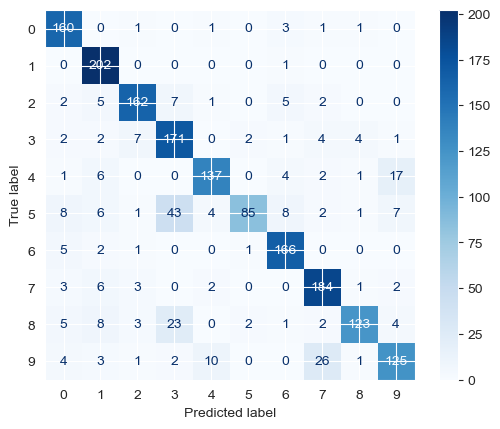

In [30]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)  # , normalize=True, sample_weight=None
model_valid_accuracy_comparisons["Random Forest"] = accuracy
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

Choose parameters using a grid search

In [31]:
# Set up the parameter grid to seaerch
param_grid = [
    {'n_estimators': list(range(100, 501, 50)), 'max_features': list(range(2, 10, 2)), 'min_samples_split': [200]}
]

# Perform the search
my_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), param_grid,
                                                      cv=cv_folds, verbose=2, n_jobs=-1)
my_tuned_model.fit(X, y)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
model_tuned_params_list["Tuned Random Forest"] = my_tuned_model.best_params_
print(my_tuned_model.best_score_)
model_accuracy_comparisons["Tuned Random Forest"] = my_tuned_model.best_score_

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters set found on development set:
{'max_features': 8, 'min_samples_split': 200, 'n_estimators': 350}
0.8395


### Bagging

Train and evaluate a simple model 

In [32]:
# Do the same job with random forests
my_model = sklearn.ensemble.BaggingClassifier(
    estimator=sklearn.tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=50), \
    n_estimators=10)
my_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   min_samples_leaf=50))

Accuracy: 0.7933333333333333
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       167
           1       0.93      0.97      0.95       203
           2       0.77      0.72      0.74       184
           3       0.72      0.78      0.75       194
           4       0.81      0.80      0.81       168
           5       0.74      0.61      0.67       165
           6       0.77      0.79      0.78       175
           7       0.86      0.83      0.84       201
           8       0.70      0.74      0.72       171
           9       0.74      0.78      0.76       172

    accuracy                           0.79      1800
   macro avg       0.79      0.79      0.79      1800
weighted avg       0.79      0.79      0.79      1800

Confusion Matrix


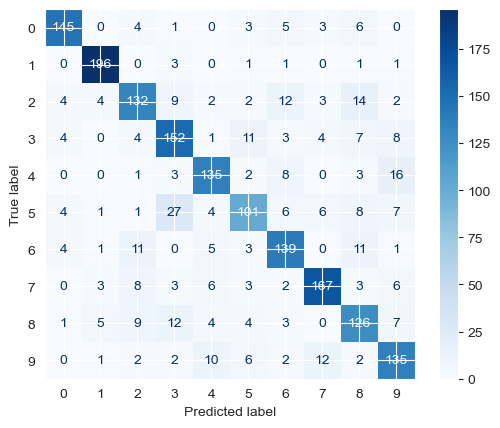

In [33]:
# Make a set of predictions for the validation data
y_pred = my_model.predict(X_valid)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)  # , normalize=True, sample_weight=None
model_valid_accuracy_comparisons["Bagging"] = accuracy
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

Choose parameters using a grid search

In [34]:
# Set up the parameter grid to seaerch
param_grid = [
    {'n_estimators': list(range(50, 501, 50))}
]

# Perform the search
my_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.ensemble.BaggingClassifier(
    estimator=sklearn.tree.DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=200)), param_grid,
                                                      cv=cv_folds, verbose=2, n_jobs=-1)
my_tuned_model.fit(X, y)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
model_tuned_params_list["Tuned Bagging"] = my_tuned_model.best_params_
print(my_tuned_model.best_score_)
model_accuracy_comparisons["Tuned Bagging"] = my_tuned_model.best_score_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters set found on development set:
{'n_estimators': 150}
0.6318333333333334


### Gradient Boosting

Train and evaluate a simple model 

In [35]:
# Do the same job with random forests
my_model = sklearn.ensemble.GradientBoostingClassifier()
my_model.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy: 0.9077777777777778
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       167
           1       0.96      0.99      0.97       203
           2       0.90      0.91      0.91       184
           3       0.90      0.87      0.88       194
           4       0.92      0.92      0.92       168
           5       0.85      0.88      0.87       165
           6       0.89      0.89      0.89       175
           7       0.93      0.93      0.93       201
           8       0.86      0.84      0.85       171
           9       0.90      0.90      0.90       172

    accuracy                           0.91      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.91      0.91      0.91      1800

Confusion Matrix


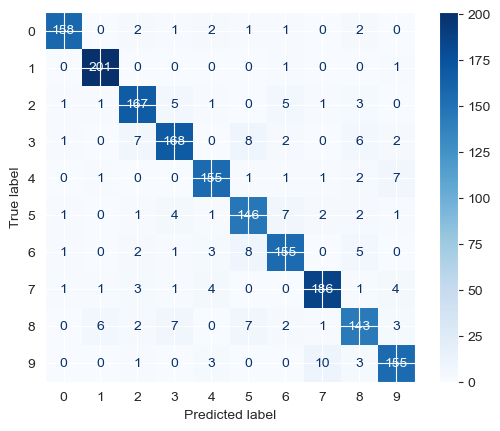

In [36]:
# Make a set of predictions for the validation data
y_pred = my_model.predict(X_valid)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)  # , normalize=True, sample_weight=None
model_valid_accuracy_comparisons["GradBoost"] = accuracy
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

Choose parameters using a grid search

In [37]:
# Set up the parameter grid to seaerch
param_grid = [
    {
        # 'n_estimators': list(range(50, 501, 50)),
        'n_estimators': list(range(50, 501, 100)),
        'learning_rate': [0.001, 0.01, 0.1]
    }
]

# Perform the search
my_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(), param_grid,
                                                      cv=cv_folds, verbose=2, n_jobs=-1)
my_tuned_model.fit(X, y)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
model_tuned_params_list["Tuned GradBoost"] = my_tuned_model.best_params_
print(my_tuned_model.best_score_)
model_accuracy_comparisons["Tuned GradBoost"] = my_tuned_model.best_score_

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] END ..criterion=gini, max_depth=9, min_samples_split=50; total time=   0.4s
[CV] END .criterion=gini, max_depth=27, min_samples_split=50; total time=   0.4s
[CV] END .criterion=gini, max_depth=48, min_samples_split=50; total time=   0.4s
[CV] END criterion=entropy, max_depth=21, min_samples_split=50; total time=   0.5s
[CV] END criterion=entropy, max_depth=39, min_samples_split=50; total time=   0.4s
[CV] END max_features=2, min_samples_split=200, n_estimators=200; total time=   0.4s
[CV] END max_features=2, min_samples_split=200, n_estimators=500; total time=   0.9s
[CV] END max_features=6, min_samples_split=200, n_estimators=100; total time=   0.2s
[CV] END max_features=6, min_samples_split=200, n_estimators=200; total time=   0.4s
[CV] END max_features=6, min_samples_split=200, n_estimators=450; total time=   0.8s
[CV] END max_features=8, min_samples_split=200, n_estimators=400; total time=   0.8s
[CV] END ...........

### Nearest Neighbour

Train and evaluate a simple model 

In [38]:
# Do the same job with random forests
my_model = sklearn.neighbors.KNeighborsClassifier()
my_model = my_model.fit(X_train, y_train)

Accuracy: 0.9211111111111111
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       167
           1       0.86      1.00      0.93       203
           2       0.96      0.91      0.94       184
           3       0.89      0.90      0.90       194
           4       0.95      0.89      0.92       168
           5       0.91      0.88      0.89       165
           6       0.94      0.98      0.96       175
           7       0.94      0.93      0.93       201
           8       0.96      0.80      0.87       171
           9       0.89      0.94      0.91       172

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.92      0.92      0.92      1800

Confusion Matrix


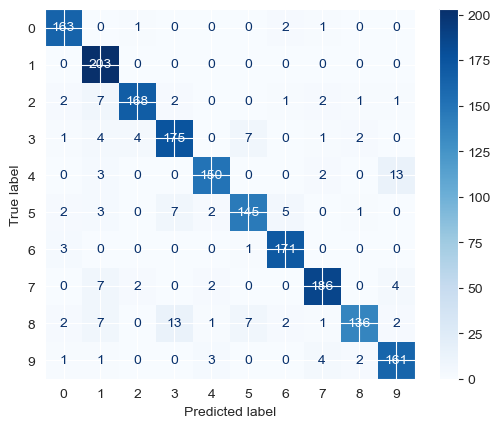

In [39]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)  # , normalize=True, sample_weight=None
model_valid_accuracy_comparisons["kNN"] = accuracy
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

Choose parameters using a grid search

In [40]:
# Set up the parameter grid to seaerch
param_grid = [
    # {'n_neighbors': list(range(1, 50, 5))}
    {'n_neighbors': list(range(1, 50, 10))}
]

# Perform the search
my_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), param_grid,
                                                      cv=cv_folds, verbose=2,
                                                      n_jobs=-1)
my_tuned_model.fit(X, y)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
model_tuned_params_list["Tuned kNN"] = my_tuned_model.best_params_
print(my_tuned_model.best_score_)
model_accuracy_comparisons["Tuned kNN"] = my_tuned_model.best_score_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters set found on development set:
{'n_neighbors': 1}
0.9191666666666667


### Compare Results

In [41]:
display(model_valid_accuracy_comparisons)

{'Better Tree': 0.6683333333333333,
 'Random Forest': 0.8416666666666667,
 'Bagging': 0.7933333333333333,
 'GradBoost': 0.9077777777777778,
 'kNN': 0.9211111111111111}

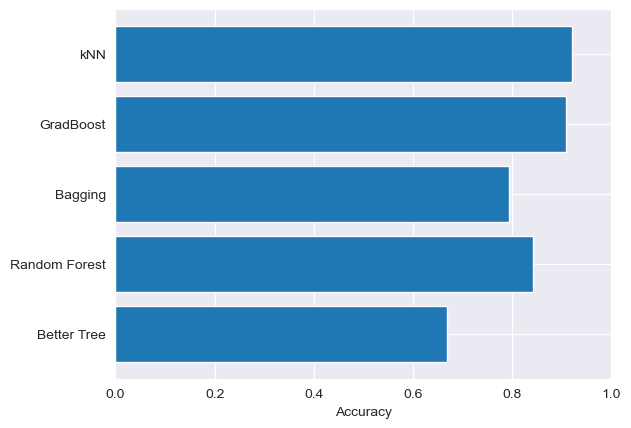

In [42]:
plt.xlim(0, 1.0)
_ = plt.barh(range(len(model_valid_accuracy_comparisons)), list(model_valid_accuracy_comparisons.values()),
             align='center')
_ = plt.yticks(range(len(model_valid_accuracy_comparisons)), list(model_valid_accuracy_comparisons.keys()))
plt.xlabel("Accuracy")
plt.show()

In [43]:
display(model_accuracy_comparisons)

{'Tuned Random Forest': 0.8395,
 'Tuned Bagging': 0.6318333333333334,
 'Tuned GradBoost': 0.9196666666666666,
 'Tuned kNN': 0.9191666666666667}

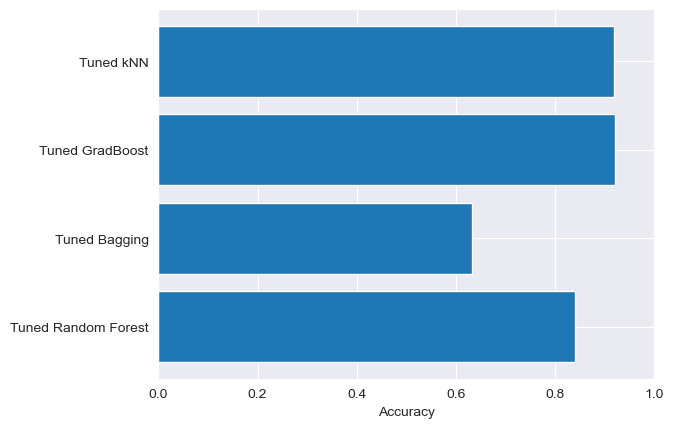

In [44]:
plt.xlim(0, 1.0)
plt.barh(range(len(model_accuracy_comparisons)), list(model_accuracy_comparisons.values()), align='center')
plt.yticks(range(len(model_accuracy_comparisons)), list(model_accuracy_comparisons.keys()))
plt.xlabel("Accuracy")
plt.show()

In [45]:
display(model_tuned_params_list)

{'Tuned Tree': {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 50},
 'Tuned Random Forest': {'max_features': 8,
  'min_samples_split': 200,
  'n_estimators': 350},
 'Tuned Bagging': {'n_estimators': 150},
 'Tuned GradBoost': {'learning_rate': 0.1, 'n_estimators': 450},
 'Tuned kNN': {'n_neighbors': 1}}

## Test Best Model On Test Dataset

In [48]:
test_filename = '../Data/mnist_test.csv'
test_dataset = pd.read_csv(test_filename)
test_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_test = test_dataset[test_dataset.columns[1:]]
y_test = np.array(test_dataset[target_feature])

In [50]:
#a = min_max_scaler.transform(X_test)
#X_test = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 

In [51]:
X_test = (X_test / 255 * 2) - 1

In [52]:
display(X_test.shape)
display(X_test.head())

(10000, 784)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [53]:
my_model = sklearn.ensemble.GradientBoostingClassifier(**(model_tuned_params_list["Tuned GradBoost"]))
my_model = my_model.fit(X_test, y_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       1.00      1.00      1.00       892
           6       1.00      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      1.00      1.00      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix


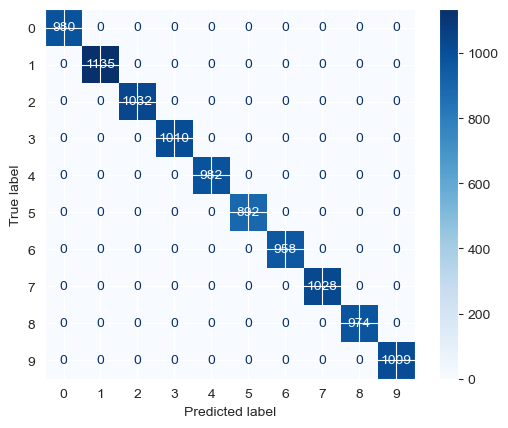

In [54]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_test)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)  # , normalize=True, sample_weight=None
print("Accuracy: " + str(accuracy))
print(sklearn.metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()